<a href="https://colab.research.google.com/github/ebyau/Deep_learning_pytorch/blob/master/MNIST_Dataset_clssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn 
import torch.nn.functional as F
from torchvision import datasets, transforms



# define transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
])
                                            
# download and load datasets
trainset = datasets.MNIST('~/.torch/MNIST_data/',download=True,train=True,
                          transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


Extracting /root/.torch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.torch/MNIST_data/MNIST/raw


Extracting /root/.torch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.torch/MNIST_data/MNIST/raw


Extracting /root/.torch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.torch/MNIST_data/MNIST/raw


Extracting /root/.torch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.torch/MNIST_data/MNIST/raw
Processing...
Done!






/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [2]:
# building feedforward model
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)
# define the loss
criterion = nn.CrossEntropyLoss()

#get data
images,labels = next(iter(trainloader))
#flatten images
images = images.view(images.shape[0],-1)

#forward pass obtain logits
logits = model(images)
#calc the loss with the logits and the labels
loss = criterion(logits,labels)
print(loss)


tensor(2.3175, grad_fn=<NllLossBackward>)


 Build a model that returns the log-softmax as the output and calculate the loss using the negative log likelihood loss.

In [3]:
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
# define the loss
criterion = nn.NLLLoss()

#get data
images,labels = next(iter(trainloader))
#flatten images
images = images.view(images.shape[0],-1)

#forward pass obtain logits
logits = model(images)
#calc the loss with the logits and the labels
loss = criterion(logits,labels)
print(loss)

tensor(2.2940, grad_fn=<NllLossBackward>)


In [15]:
# doing forward and backward propagation to the model
from torch import optim
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr=0.03)

epoch=5
for e in range(epoch):
  running_loss = 0
  for images, labels in trainloader:
    images= images.view(images.shape[0],-1)
    optimizer.zero_grad()

    # output = model
    output = model.forward(images)
    loss = criterion(output,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f"training loss: {running_loss/len(trainloader)}")


training loss: 0.6172466278711616
training loss: 0.2831019564017431
training loss: 0.21792158732282074
training loss: 0.17506165415652272
training loss: 0.1462599252805368


In [0]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

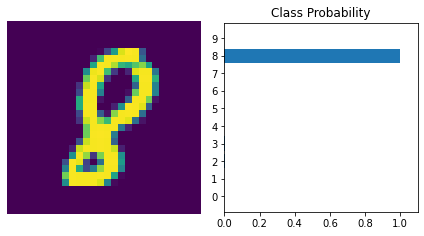

In [30]:
%matplotlib inline

images , labels = next(iter(trainloader))

img = images[0].view(1,784)

 # turn off gradiennts to spend up this part
with torch.no_grad():
   logps = model(img)

#Outputs are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1,28,28),ps)